# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [99]:
import pandas as pd

In [100]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [101]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [102]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

moving = pd.read_csv('C:/Users/User/iCloudDrive/AIVLE/3주차/2023.02.13_미니프로젝트1차_실습자료/df_seoul_moving.csv')
station = pd.read_csv('C:/Users/User/iCloudDrive/AIVLE/3주차/2023.02.13_미니프로젝트1차_실습자료/df_seoul_bus_station.csv')
business = pd.read_csv('C:/Users/User/iCloudDrive/AIVLE/3주차/2023.02.13_미니프로젝트1차_실습자료/df_seoul_business.csv')
people = pd.read_csv('C:/Users/User/iCloudDrive/AIVLE/3주차/2023.02.13_미니프로젝트1차_실습자료/df_seoul_people.csv')

In [103]:
moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동 인구,자치구
0,11010.0,20.826215,47.180038,8538540.0,19343343.60,종로구
1,11020.0,20.477532,47.416648,8496210.0,19673357.11,중구
2,11030.0,20.803600,39.618091,7700390.0,14664517.37,용산구
3,11040.0,21.123557,45.747642,8037450.0,17406840.45,성동구
4,11050.0,21.725068,50.373329,7721980.0,17904746.49,광진구


In [104]:
station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,506,97,8039873,7583761,128.492001,121.202490
1,강동구,373,23,2894641,2839343,99.019635,97.128006
2,강북구,413,70,4825181,4671783,133.020373,128.791504
3,강서구,566,53,4681083,4652828,88.119480,87.587591
4,관악구,468,94,7660935,7801232,153.911301,156.729925


In [105]:
business.head()

,자치구,택시운송업,한식및일반음식점,커피전문점,기타주점업,학원
0,종로구,215,5912,3613,1413,382
1,중구,230,6414,3542,982,175
2,용산구,416,2987,2076,1332,573
3,성동구,1200,2785,1859,621,1494
4,광진구,1119,2861,1887,1577,1646


In [106]:
people.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
1,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
2,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
3,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
4,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896


In [107]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df = pd.merge(standard, station, how='inner', on='자치구')

In [108]:
df = pd.merge(df, moving, how='inner', on='자치구')
df = pd.merge(df, business, how='inner', on='자치구')
df = pd.merge(df, people, how='inner', on='자치구')
df

,도착 시군구 코드_x,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,도착 시군구 코드_y,평균 이동 시간(분),...,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,11010,종로구,350,114,5469428,5206315,131.828388,125.486635,11010.0,20.826215,...,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,11020,중구,178,110,3776815,3599090,120.923863,115.233567,11020.0,20.477532,...,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,11030,용산구,323,72,4189977,4086474,137.891694,134.485421,11030.0,20.803600,...,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
3,11040,성동구,436,60,2809917,2747045,96.362037,94.205933,11040.0,21.123557,...,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,11050,광진구,272,44,2754792,2759823,117.525256,117.739889,11050.0,21.725068,...,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
5,11060,동대문구,306,77,5240633,5115465,131.836507,128.687706,11060.0,20.948982,...,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
6,11070,중랑구,423,52,3802179,3748768,85.080870,83.885699,11070.0,22.500065,...,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
7,11080,성북구,606,103,6243803,6235524,123.028177,122.865047,11080.0,21.431668,...,212277,230403,433150,208691,224459,9530,3586,5944,2.20,75719
8,11090,강북구,413,70,4825181,4671783,133.020373,128.791504,11090.0,22.810479,...,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961
9,11100,도봉구,361,49,3318926,3243122,106.917273,104.475292,11100.0,23.310262,...,154440,163660,316098,153716,162382,2002,724,1278,2.28,65122


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

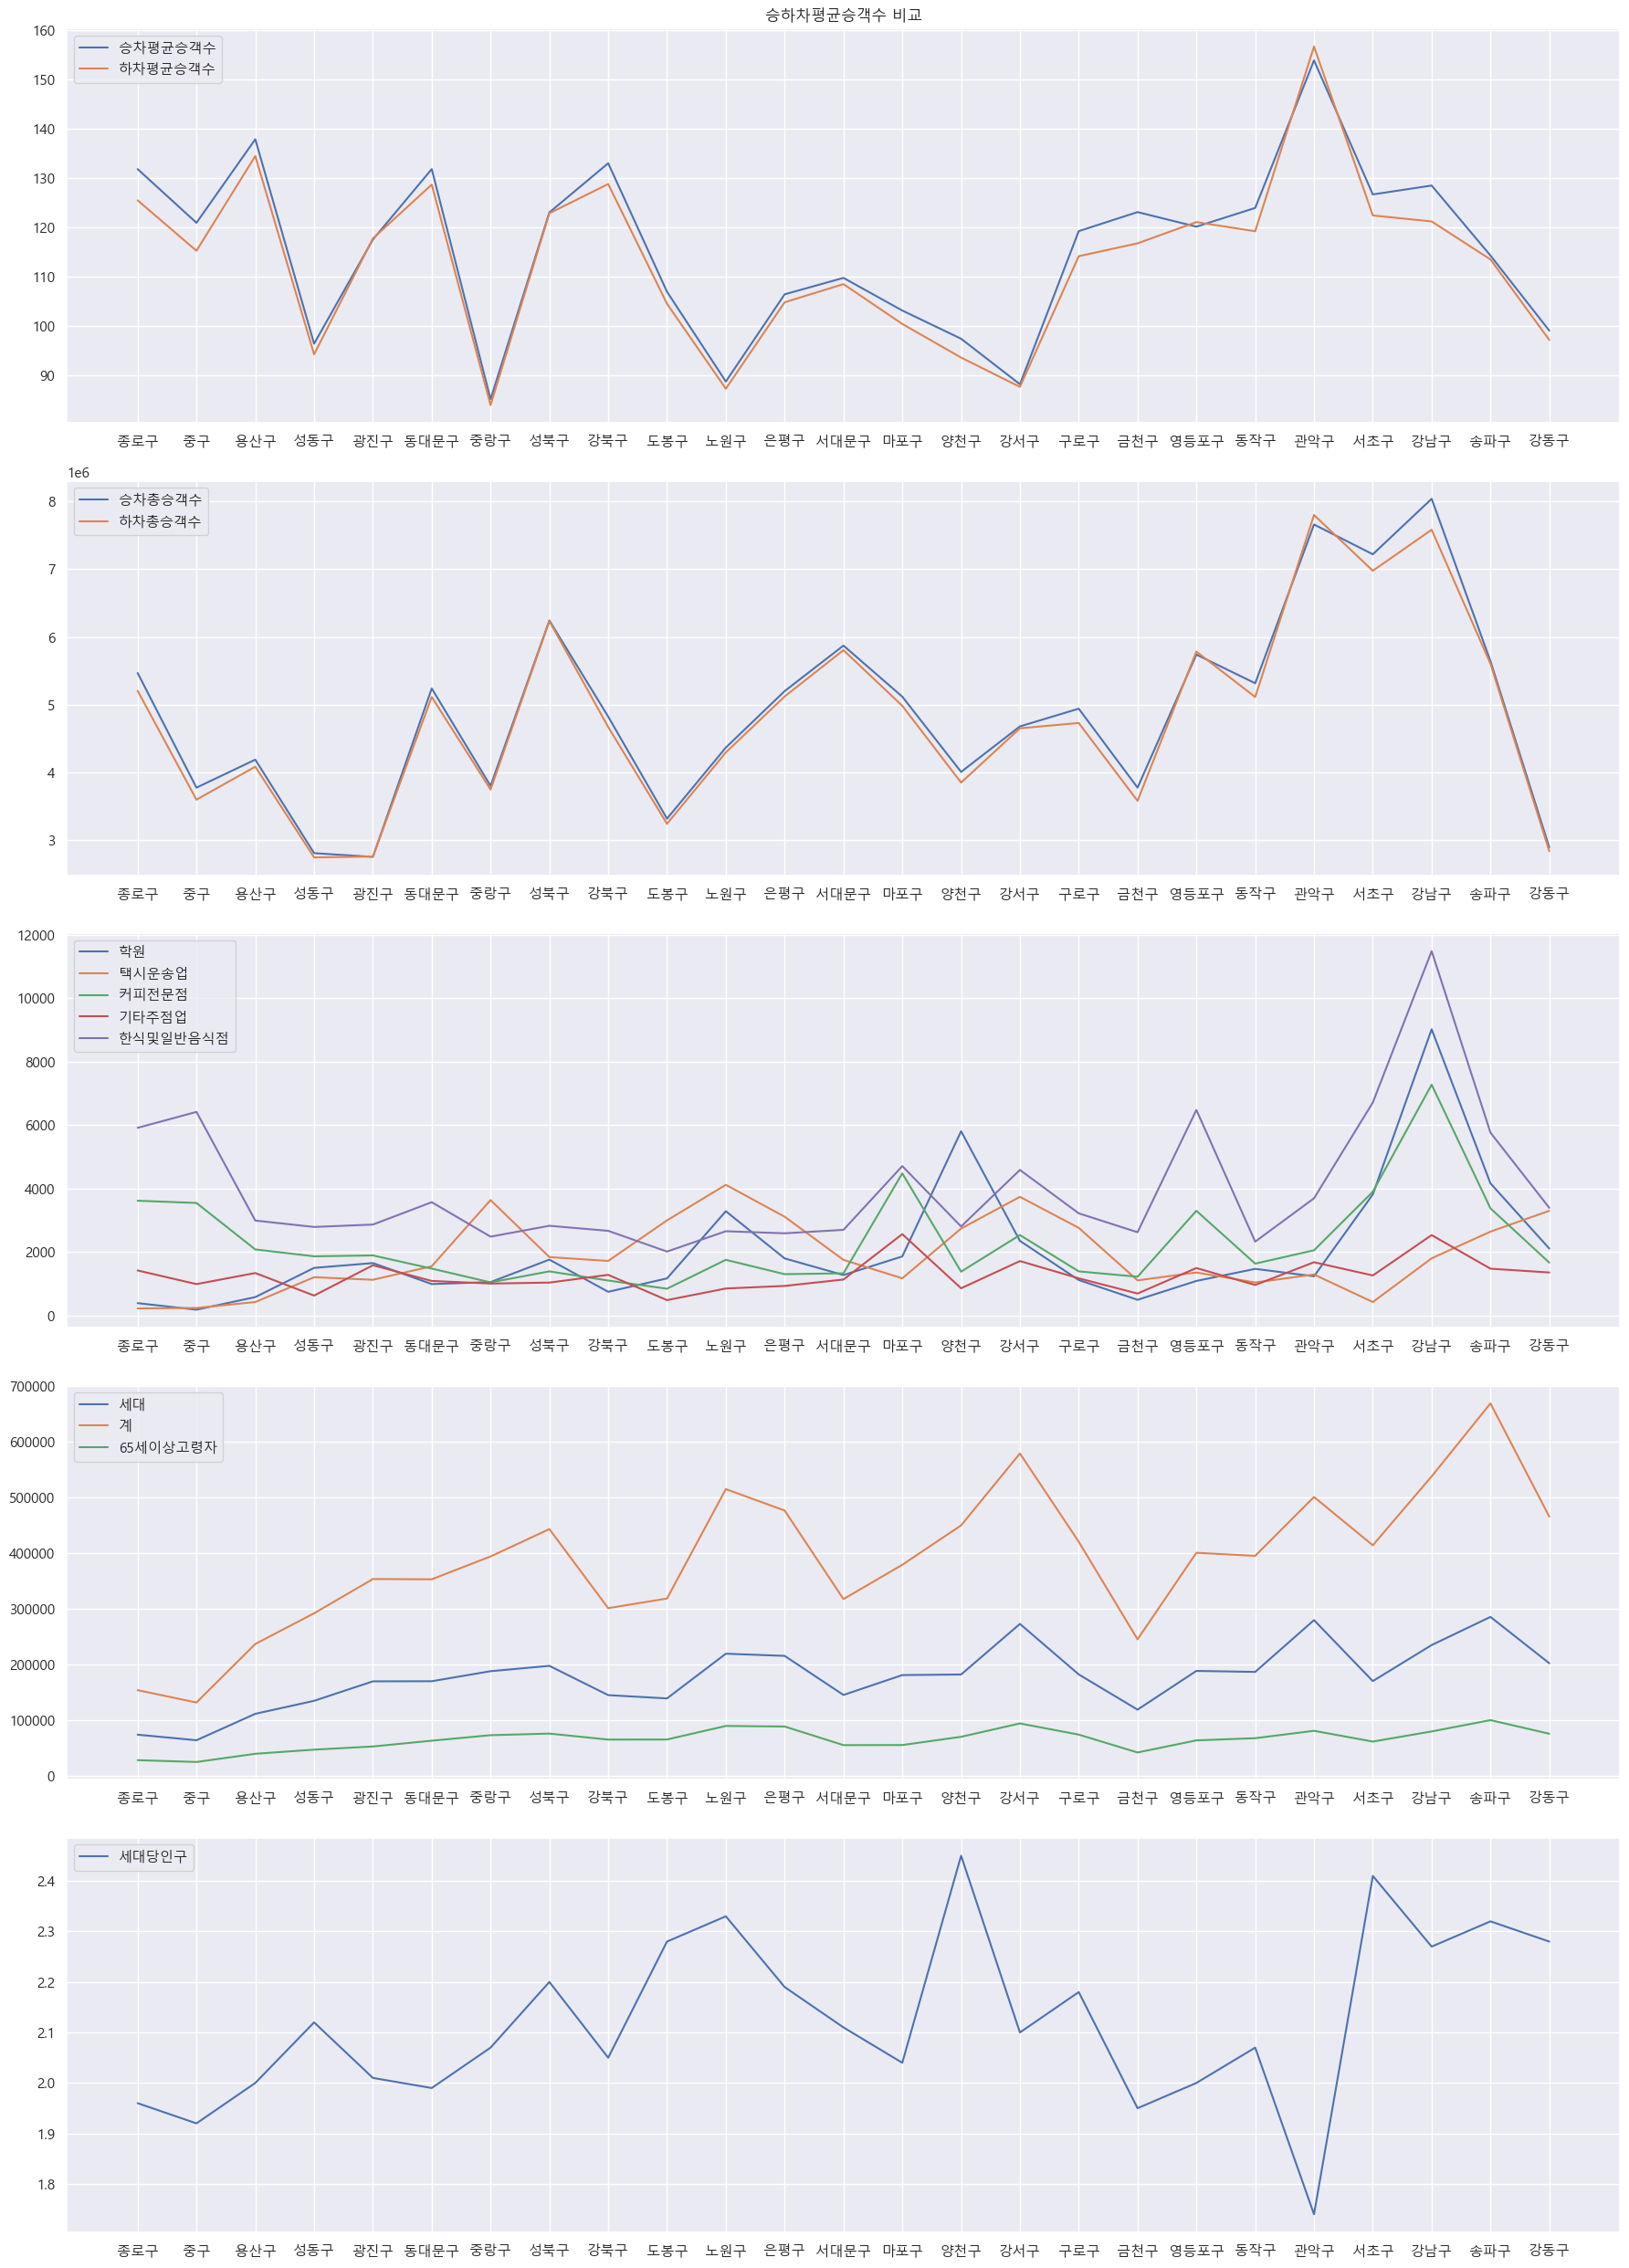

In [111]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(18,25))


# sns.barplot(x='자치구', y='승차평균승객수', data = df)
plt.subplot(5, 1, 1)
plt.plot('자치구', '승차평균승객수', data = df)
plt.plot('자치구', '하차평균승객수', data = df)
plt.title('승하차평균승객수 비교')
plt.legend(loc = 'upper left')


plt.subplot(5, 1, 2)
plt.plot('자치구', '승차총승객수', data = df)
plt.plot('자치구', '하차총승객수', data = df)
plt.legend(loc = 'upper left')

plt.subplot(5, 1, 3)
plt.plot('자치구', '학원', data = business)
plt.plot('자치구', '택시운송업', data = business)
plt.plot('자치구', '커피전문점', data = business)
plt.plot('자치구', '기타주점업', data = business)
plt.plot('자치구', '한식및일반음식점', data = business)
plt.legend(loc = 'upper left')

plt.subplot(5, 1, 4)
plt.plot('자치구', '세대', data = df)
plt.plot('자치구', '계', data = df)
plt.plot('자치구', '65세이상고령자', data = df)
plt.legend(loc = 'upper left')

plt.subplot(5, 1, 5)
plt.plot('자치구', '세대당인구', data = df)
plt.legend(loc = 'upper left')


plt.tight_layout()
plt.show()

In [112]:
import scipy.stats as stats

# 피어슨 상관계수 검정
# corr = stats.pearsonr(cor01.sales, cor01.gdp1)
# corr

In [113]:
# 하차총승객수와 거주인구의 pearsonr 측정
# spst.pearsonr(air['Temp'], air['Ozone'])

stats.pearsonr(df['하차총승객수'], df['계'])

PearsonRResult(statistic=0.38845611055054785, pvalue=0.05498687315941891)

In [125]:
stats.pearsonr(df['정류장수'], df['하차총승객수'])

PearsonRResult(statistic=0.5710409311922551, pvalue=0.0028698733919853884)

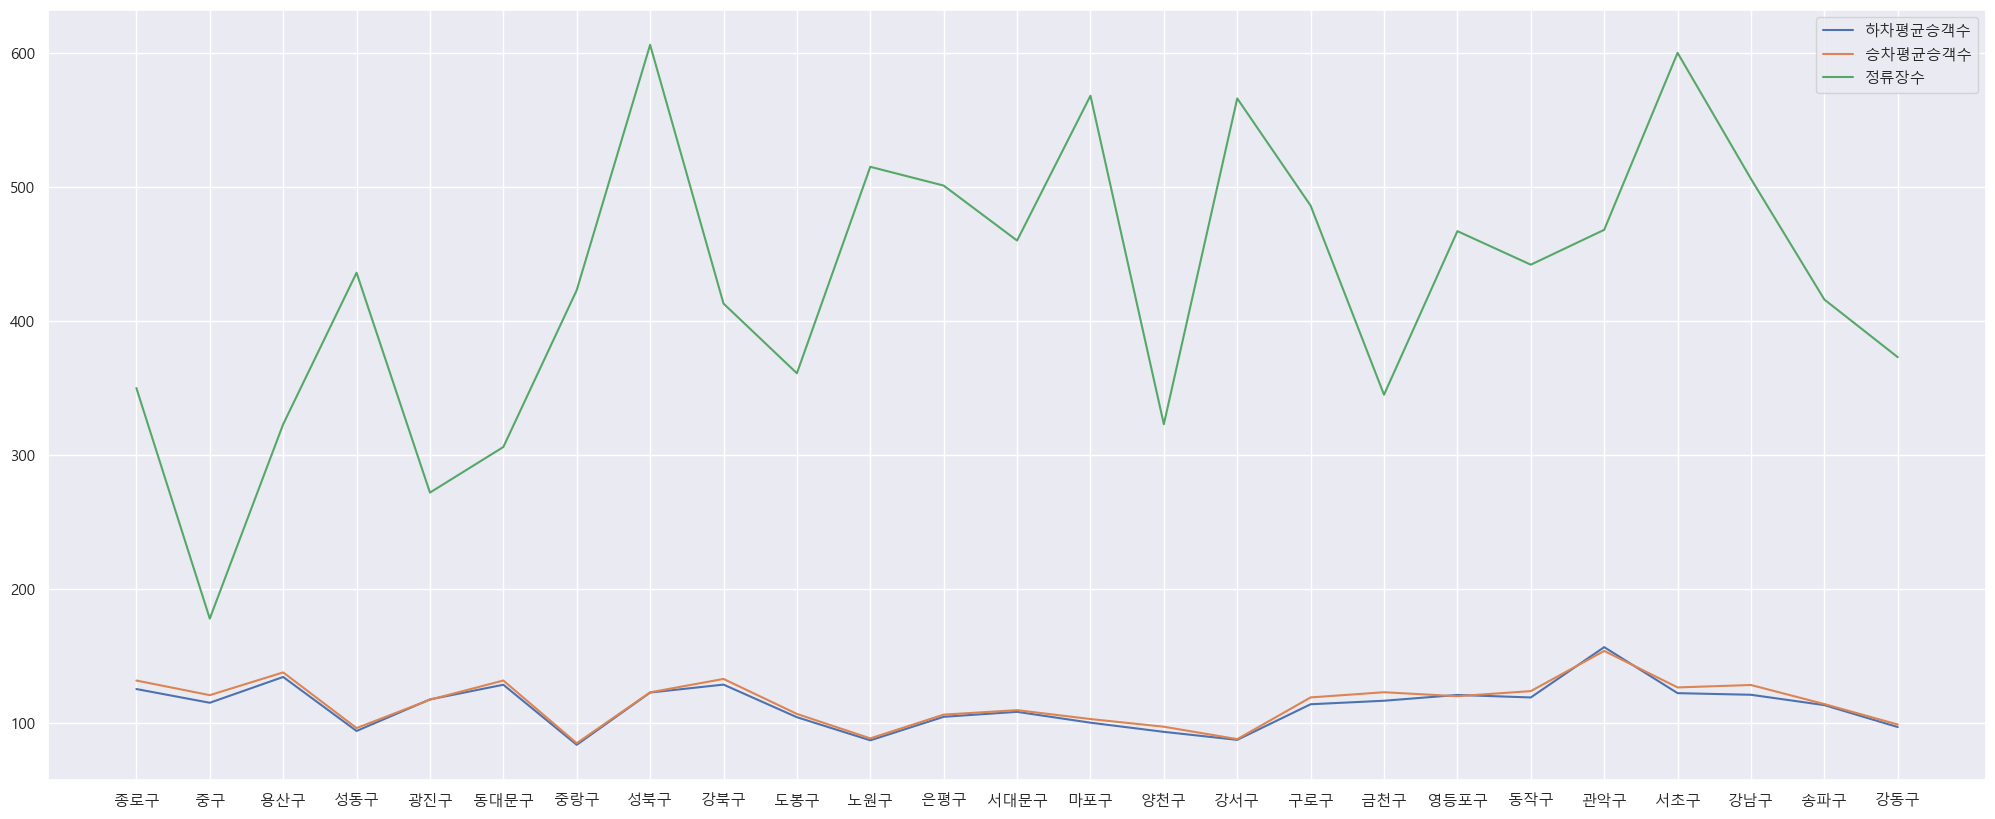

In [138]:
plt.figure(figsize=(25, 10))
plt.plot('자치구', '하차평균승객수', data = df)
plt.plot('자치구', '승차평균승객수', data = df)
plt.plot('자치구', '정류장수', data = df)

plt.legend()
plt.show()

In [121]:
unboarding = df[['자치구','하차총승객수','계']]

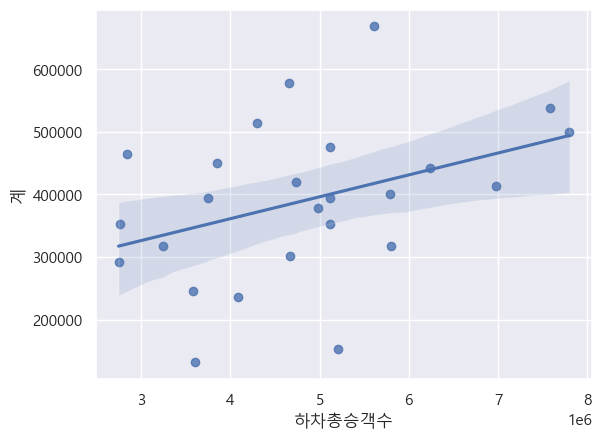

In [124]:

sns.regplot(x='하차총승객수', y='계', data = unboarding)
plt.show()

In [78]:
# pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

pd.crosstab(df[''])

TypeError: crosstab() missing 2 required positional arguments: 'index' and 'columns'

관악구의 경우 승객수에 비해 노선이 부족한 것처럼 보인다

성동구의 경우 노선 수에 비해 정류장이 과도하게 많아 노선 증설이 필요할 것으로 생각되었으나 실제로 승하차하는 승객의 수는 가장 적은 편에 속하여 증설할 필요가 없는 것으로 보였다.



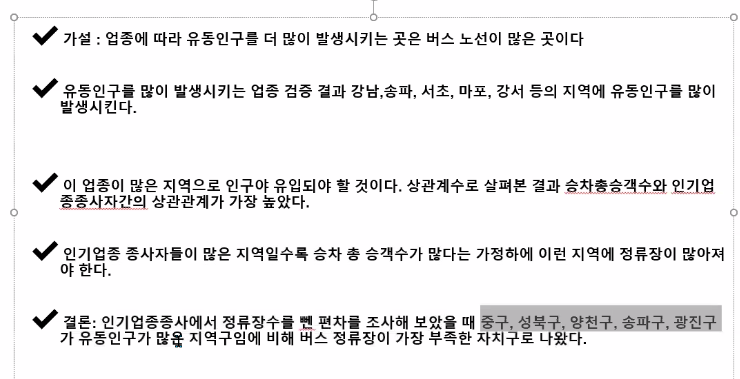

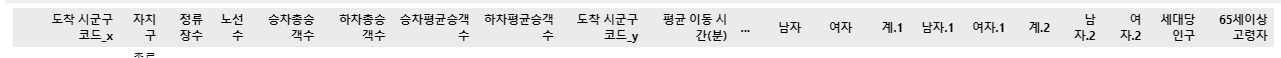

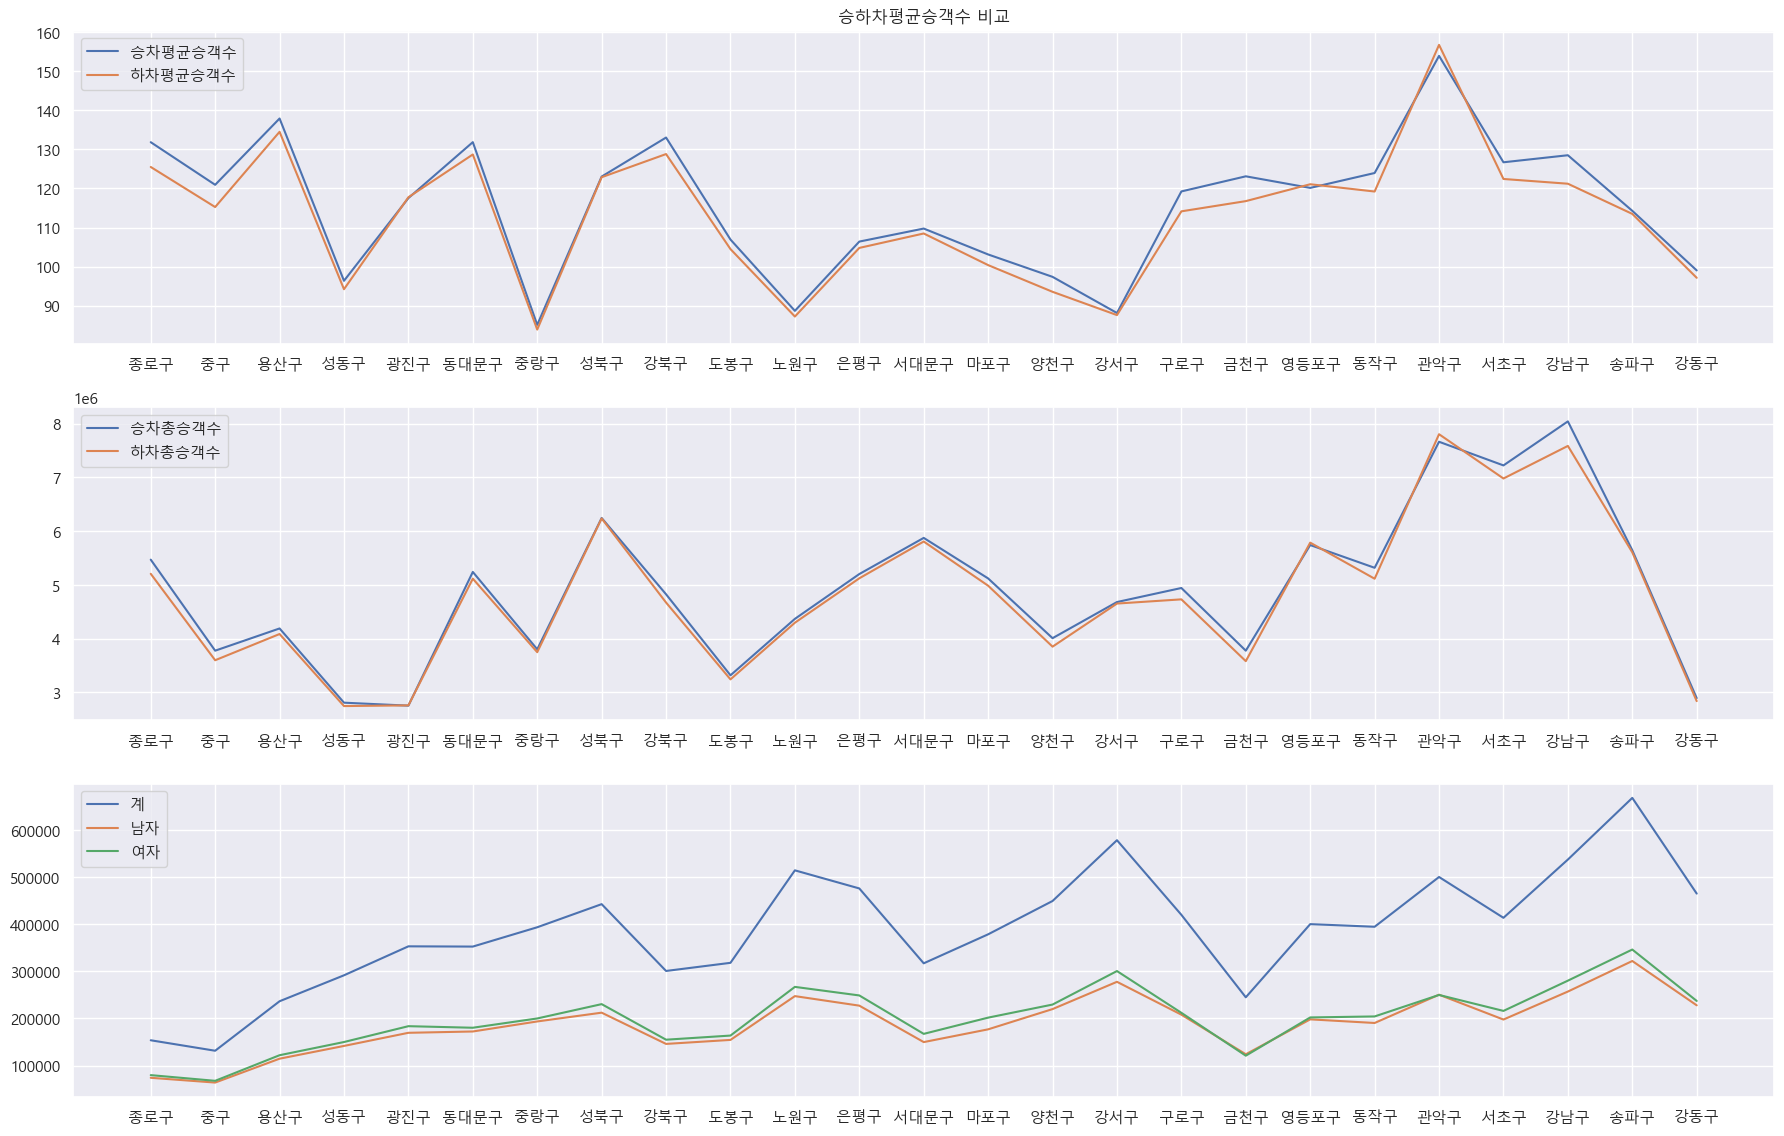

In [80]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(18,15))


# sns.barplot(x='자치구', y='승차평균승객수', data = df)
plt.subplot(4, 1, 1)
plt.plot('자치구', '승차평균승객수', data = df)
plt.plot('자치구', '하차평균승객수', data = df)
plt.title('승하차평균승객수 비교')
plt.legend(loc = 'upper left')


plt.subplot(4, 1, 2)
plt.plot('자치구', '승차총승객수', data = df)
plt.plot('자치구', '하차총승객수', data = df)
plt.legend(loc = 'upper left')

plt.subplot(4, 1, 3)
plt.plot('자치구', '계', data = df)
plt.plot('자치구', '남자', data = df)
plt.plot('자치구', '여자', data = df)
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [ ]:
노원구 및 송파구는 거주주민은 많지만 심야시간대 이동인구는 많지 않음
서대문구의 경우 실제 거주민 대비 심야시간대 승하차 비율이 높음


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

1. 심야시간대 승차승객의 비중이 높은 지역 중 상업지구의 분포가 낮은 지역은 유흥보다는 업무지구일 가능성이 높음 (주말 운영 최소화)
    - 주말시간대 노선은 줄이고 평일 노선은 필요성에 따라 늘릴 수 있을 것

2. 세대당 인구 대비 심야 하차 비율이 높은 지역 == 자취인구가 많은 것으로 파악할 수 있음 > 노선 증설할 필요성 있음

3. 평균 승하차 인원 대비 총인원간의 차이가 많은 곳
    1. 총인원은 많은데 평균 승하차 인원이 적은 경우 = 이미 충분한 수량의 노선이 있기 때문인 것으로 보임
    2. 총인원이 적은데 평균 승하차 인원이 많은 경우 = 해당 노선을 증설할 필요성이 있다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [ ]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?